# Class Workbook

## In class activity

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
#import ISLP as islp

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

### COVID Data

Let's revisit COVID data.
I've divided the data into training and testing data.

In [2]:
import zipfile
Train_COVID= pd.read_csv('Train_COVID.zip',compression='zip')
Test_COVID= pd.read_csv('Test_COVID.zip',compression='zip')

In [3]:
Train_COVID.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,FEMALE,AGE_TRUNK,SURVIVED
0,2,12,2,2,9999-99-99,0.0,1.0,64,0.0,1,...,2,2,2,2,2,5,0.0,0,64,1
1,1,12,1,1,9999-99-99,NaN,0.0,52,0.0,1,...,2,2,2,2,2,7,NaN,1,52,1
2,2,4,1,1,9999-99-99,NaN,0.0,30,0.0,2,...,1,2,2,2,1,7,NaN,1,30,1
3,2,12,1,2,9999-99-99,0.0,0.0,38,0.0,1,...,2,2,1,2,2,3,0.0,1,38,1
4,2,12,2,2,9999-99-99,0.0,1.0,72,0.0,2,...,2,2,2,2,1,3,0.0,0,72,1


In [4]:
print(Train_COVID.shape)

(702545, 24)


Use SVM to classify the patients that survive.
See if you can improve the performance over GAM or logistic regression from the previous chapters.

Your code:

In [5]:
X_train = Train_COVID.drop('SURVIVED', axis=1)[['PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'RENAL_CHRONIC', 'FEMALE']]
Y_train = Train_COVID['SURVIVED']
X_test = Test_COVID.drop('SURVIVED', axis=1)[['PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'RENAL_CHRONIC', 'FEMALE']]
Y_test = Test_COVID['SURVIVED']

X_train = pd.get_dummies(X_train, columns=['PNEUMONIA', 'PREGNANT', 'DIABETES', 'RENAL_CHRONIC', 'FEMALE'])

X_test = pd.get_dummies(X_test, columns=['PNEUMONIA', 'PREGNANT', 'DIABETES', 'RENAL_CHRONIC', 'FEMALE'])

# normalize AGE column using training statistics
meanTrainAGE = X_train['AGE'].mean()
stdTrainAGE = X_train['AGE'].std()

X_train['AGE_SCALE'] = (X_train['AGE'] - meanTrainAGE)/stdTrainAGE
X_test['AGE_SCALE'] = (X_test['AGE'] - meanTrainAGE)/stdTrainAGE


In [6]:
# Take subdatasets to fit SVM
X_train_samples  = X_train.sample(n = 10000, random_state=42)
Y_train_samples = Y_train.iloc[X_train_samples.index]


In [8]:
from sklearn.svm import SVC

covid_SVM = SVC(kernel = 'linear')
covid_SVM.fit(X_train_samples.drop('AGE', axis=1), Y_train_samples)

y_pred = covid_SVM.predict(X_test.drop('AGE', axis=1))

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred))

print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.927457156893911
[[     0  25102]
 [     0 320928]]


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Ames Housing data

Let's revisit Ames Housing data.

In [3]:
ames_raw=pd.read_csv("ames_raw.csv")

### Questions

Use data of `ames_raw` up to 2008 to predict the housing price for the later years.

In [4]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [5]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

In [7]:
ames_raw_2008.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Fit support vector regression to the sales price.  How is the prediction compared to the previous models you've fit?

Your code:

In [12]:
Sel_vars = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold','Yr Sold']

In [14]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(ames_raw_2008[Sel_vars])
X_test = scaler.transform(ames_raw_2009[Sel_vars])
y_train = ames_raw_2008['SalePrice']
y_test = ames_raw_2009['SalePrice']

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
calc_loss(y_pred,y_test)

(75430.38305521224, 47102762.50275023)

Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### SVC

Generate a simulated two-class data set with 100 observations and two features with a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

Your code:

In [11]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Kernel

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with `n = 500` and `p = 2`, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [12]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

Your code:

In [13]:
#
#

(b) Plot the observations, colored according to their class labels.  Your plot should display $X_1$ on the x-axis, and $X_2$ on the yaxis.

Your code:

In [14]:
#
#

(c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

Your code:

In [15]:
#
#

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.


Your code:

In [16]:
#
#

(e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X^2_1$ , $X_1\times X_2$, $log(X_2)$, and so forth).

Your code:

In [17]:
#
#

(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.


Your code:

In [18]:
#
#

(g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.


Your code:

In [19]:
#
#

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

Your code:

In [20]:
#
#

(i) Comment on your results.


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Auto

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

In [57]:
from ISLP import load_data
Auto = load_data("Auto")

In [58]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

Your code:

In [60]:
Auto['mpgInt'] = (Auto['mpg'] > Auto['mpg'].median()).astype(int)

In [61]:
Auto.apply(lambda x: len(x.value_counts()))

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
mpgInt            2
dtype: int64

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

Your code:

In [77]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

auto = Auto.drop('name', axis = 1)
X = auto.drop('mpgInt', axis = 1)
y = auto['mpgInt']

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [78]:
# CV
svc = SVC(kernel = 'linear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
gridAutoLinear = GridSearchCV(svc, param_grid, cv = 10)
gridAutoLinear.fit(X, y)

best_C = gridAutoLinear.best_params_['C']
print("Best C:", best_C)

auto_linear_svc_best = SVC(kernel='linear', C=best_C)
auto_linear_svc_best.fit(X, y)

scores = cross_val_score(auto_linear_svc_best, X, y, cv=5, scoring='accuracy')
errors = 1 - scores
for i, error in enumerate(errors, 1):
    print(f"Error for CV 'C' = {param_grid.get('C')[i-1]} at iteration {i}: {error}")

# Report the mean cross-validation error
mean_error = errors.mean()
print("Mean Cross-Validation Error:", mean_error)

Best C: 100
Error for CV 'C' = 0.01 at iteration 1: 0.0
Error for CV 'C' = 0.1 at iteration 2: 0.0
Error for CV 'C' = 1 at iteration 3: 0.012820512820512775
Error for CV 'C' = 10 at iteration 4: 0.0
Error for CV 'C' = 100 at iteration 5: 0.0
Mean Cross-Validation Error: 0.002564102564102555


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

Your code:

In [79]:
svc_radial = SVC(kernel = 'rbf')
gridAutoRadial = GridSearchCV(svc_radial, param_grid, cv = 10)
gridAutoRadial.fit(X, y)

best_C_radial = gridAutoRadial.best_params_['C']
print("Best C for Radial:", best_C_radial)

auto_radial_svc_best = SVC(kernel='rbf', C=best_C_radial)
auto_radial_svc_best.fit(X, y)

scores_radial = cross_val_score(auto_radial_svc_best, X, y, cv=5, scoring='accuracy')
errors_radial = 1 - scores_radial
for i, error in enumerate(errors_radial, 1):
    print(f"Error for Radial CV 'C' = {param_grid.get('C')[i-1]} at iteration {i}: {error}")

mean_error_radial = errors_radial.mean()
print("Mean Cross-Validation Error for Radial:", mean_error_radial)

Best C for Radial: 100
Error for Radial CV 'C' = 0.01 at iteration 1: 0.11392405063291144
Error for Radial CV 'C' = 0.1 at iteration 2: 0.025316455696202556
Error for Radial CV 'C' = 1 at iteration 3: 0.05128205128205132
Error for Radial CV 'C' = 10 at iteration 4: 0.05128205128205132
Error for Radial CV 'C' = 100 at iteration 5: 0.038461538461538436
Mean Cross-Validation Error for Radial: 0.05605322947095102


In [80]:
svc_poly = SVC(kernel = 'poly', degree=2)
gridAutoPoly = GridSearchCV(svc_poly, param_grid, cv = 10)
gridAutoPoly.fit(X, y)

best_C_poly = gridAutoPoly.best_params_['C']
print("Best C for Polynomial:", best_C_poly)

auto_poly_svc_best = SVC(kernel='poly', degree=2, C=best_C_poly)
auto_poly_svc_best.fit(X, y)

scores_poly = cross_val_score(auto_poly_svc_best, X, y, cv=5, scoring='accuracy')
errors_poly = 1 - scores_poly
for i, error in enumerate(errors_poly, 1):
    print(f"Error for Polynomial CV 'C' = {param_grid.get('C')[i-1]} at iteration {i}: {error}")

mean_error_poly = errors_poly.mean()
print("Mean Cross-Validation Error for Polynomial:", mean_error_poly)

Best C for Polynomial: 10
Error for Polynomial CV 'C' = 0.01 at iteration 1: 0.40506329113924056
Error for Polynomial CV 'C' = 0.1 at iteration 2: 0.26582278481012656
Error for Polynomial CV 'C' = 1 at iteration 3: 0.15384615384615385
Error for Polynomial CV 'C' = 10 at iteration 4: 0.10256410256410253
Error for Polynomial CV 'C' = 100 at iteration 5: 0.3076923076923077
Mean Cross-Validation Error for Polynomial: 0.24699772801038625


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Make some plots to back up your assertions in (b) and (c).

Hint: In the lab, we used the `plot_svm()` function for fitted SVMs.
When `p > 2`, you can use the keyword argument features to
create plots displaying pairs of variables at a time.

Your code:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

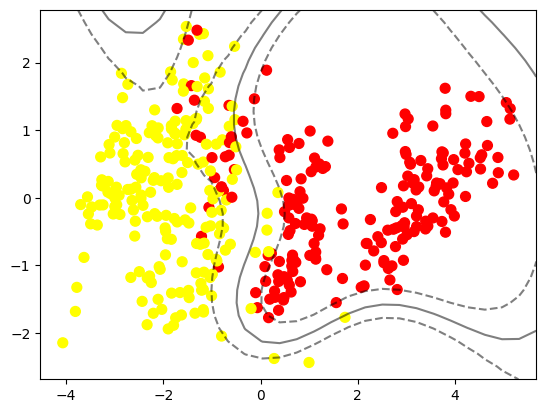

In [82]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

auto_radial_svc_best.fit(X_2D, y)

plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(auto_radial_svc_best)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

### OJ
This problem involves the OJ data set which is part of the ISLR2 package.

In [6]:
from ISLP import load_data
OJ = load_data("OJ")

In [7]:
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [8]:
print(OJ.shape)

(1070, 18)


In [17]:
X_traindf.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


Your code:

In [44]:
from sklearn.preprocessing import StandardScaler

train_id = np.random.randint(0, OJ.shape[1], 800)
traindf = OJ.iloc[train_id]
testdf = OJ.drop(train_id)

X_train = traindf.drop(['Purchase', 'StoreID'], axis=1)
Y_train = traindf['Purchase']
X_test = testdf.drop(['Purchase', 'StoreID'], axis=1)
Y_test = testdf['Purchase']

X_trainNum = X_train.drop('Store7', axis = 1)
X_testNum = X_test.drop('Store7', axis = 1)

# Scale the numerical columns
scaler = StandardScaler()
X_trainNumScaled = pd.DataFrame(scaler.fit_transform(X_trainNum), columns=X_trainNum.columns).reset_index(drop = True)
X_testNumScaled = pd.DataFrame(scaler.transform(X_testNum), columns=X_testNum.columns).reset_index(drop = True)

# get dummy of the Store7 column
X_trainStore7 = pd.get_dummies(X_train['Store7'], drop_first=True, prefix='Store7').reset_index(drop = True)
X_testStore7 = pd.get_dummies(X_test['Store7'], drop_first=True, prefix='Store7').reset_index(drop = True)

# Concatenate the scaled numerical columns and the dummy columns
X_traindf = pd.concat([X_trainNumScaled, X_trainStore7], axis=1)
X_testdf = pd.concat([X_testNumScaled, X_testStore7], axis=1)

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Fit a support vector classifier to the training data using
`C = 0.01`, with `Purchase` as the response and the other variables
as predictors. How many support points are there?

Your code:

In [45]:
X_traindf = X_traindf.replace([np.inf, -np.inf], np.nan)
X_trainNAindex = X_traindf.index[X_traindf.isna().any(axis=1)]
X_traindf = X_traindf.dropna(how="any")

X_testdf = X_testdf.replace([np.inf, -np.inf], np.nan)
X_testNAindex = X_testdf.index[X_testdf.isna().any(axis=1)]
X_testdf = X_testdf.dropna(how="any")

Y_train = Y_train.drop(X_trainNAindex)
Y_test = Y_test.drop(X_testNAindex)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

OJSVM = SVC(kernel = 'linear', C=0.01)
OJSVM.fit(X_traindf, Y_train)

y_pred = OJSVM.predict(X_testdf)



0.314638783269962


Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) What are the training and test error rates?


Your code:

In [48]:
# training error
print(1 - accuracy_score(Y_train, OJSVM.predict(X_traindf)))

#testing error
print(1 - accuracy_score(Y_test, y_pred))

0.0
0.314638783269962


Your answer:

~~~
Please write your answer in full sentences.

Looks like it is an overfitting.

~~~

(d) Use cross-validation to select an optimal `C`. Consider values in the range 0.01 to 10.

Your code:

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10]}

OJSVM = SVC(kernel='linear')


grid_search = GridSearchCV(OJSVM, param_grid, cv=5)  

grid_search.fit(X_traindf, Y_train)

best_C = grid_search.best_params_['C']
print("Best C:", best_C)

OJSVM_best = SVC(kernel='linear', C=best_C)
OJSVM_best.fit(X_traindf, Y_train)

Best C: 1


SVC(C=1, kernel='linear')

Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Compute the training and test error rates using this new value for C.

Your code:

In [51]:
# Assuming X_testdf and Y_test are your test data and labels

# Compute training error rate
train_score = OJSVM_best.score(X_traindf, Y_train)
train_error_rate = 1 - train_score

test_score = OJSVM_best.score(X_testdf, Y_test)
test_error_rate = 1 - test_score

print("Training Error Rate:", train_error_rate)
print("Test Error Rate:", test_error_rate)

Training Error Rate: 0.0
Test Error Rate: 0.18726235741444863


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.


Your code:

In [54]:
OJSVM_radial = SVC(kernel='rbf')

grid_search_radial = GridSearchCV(OJSVM_radial, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search_radial.fit(X_traindf, Y_train)

best_C = grid_search_radial.best_params_['C']
print("Best C:", best_C)

OJSVM_radial_best = SVC(kernel='rbf', C=best_C)
OJSVM_radial_best.fit(X_traindf, Y_train)

rbf_train_score = OJSVM_radial_best.score(X_traindf, Y_train)
rbf_train_error_rate = 1 - rbf_train_score

rbf_test_score = OJSVM_radial_best.score(X_testdf, Y_test)
rbf_test_error_rate = 1 - rbf_test_score

print("Training Error Rate:", rbf_train_error_rate)
print("Test Error Rate:", rbf_test_error_rate)

Best C: 10
Training Error Rate: 0.0
Test Error Rate: 0.18441064638783267


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree = 2`.

Your code:

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

OJSVM_poly = SVC(kernel='poly', degree=2)
grid_search_poly = GridSearchCV(OJSVM_poly, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search_poly.fit(X_traindf, Y_train)

best_C = grid_search_poly.best_params_['C']
print("Best C:", best_C)

OJSVM_poly_best = SVC(kernel='poly', degree=2, C=best_C)
OJSVM_poly_best.fit(X_traindf, Y_train)

poly_train_score = OJSVM_poly_best.score(X_traindf, Y_train)
poly_train_error_rate = 1 - poly_train_score

poly_test_score = OJSVM_poly_best.score(X_testdf, Y_test)
poly_test_error_rate = 1 - poly_test_score

print("Training Error Rate:", poly_train_error_rate)
print("Test Error Rate:", poly_test_error_rate)

Best C: 10
Training Error Rate: 0.0
Test Error Rate: 0.2072243346007605


Your answer:

~~~
Please write your answer in full sentences.


~~~

(h) Overall, which approach seems to give the best results on this data?

Your code:

In [56]:
print('linear kernel')
print("Training Error Rate:", train_error_rate)
print("Test Error Rate:", test_error_rate)

print('RBF kernel')
print("Training Error Rate:", rbf_train_error_rate)
print("Test Error Rate:", rbf_test_error_rate)

print('Polynomial kernel') 
print("Training Error Rate:", poly_train_error_rate)
print("Test Error Rate:", poly_test_error_rate)


linear kernel
Training Error Rate: 0.0
Test Error Rate: 0.18726235741444863
RBF kernel
Training Error Rate: 0.0
Test Error Rate: 0.18441064638783267
Polynomial kernel
Training Error Rate: 0.0
Test Error Rate: 0.2072243346007605


Your answer:

~~~
Please write your answer in full sentences.

The RBF has the best performance on predicting the testing dataset.

~~~

## Additional Content

In [35]:
def make_grid(xx, yy, margin=0, mesh_size = .02, length_out=10):
    x_min, x_max = xx.min() - margin, xx.max() + margin
    y_min, y_max = yy.min() - margin, xx.max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
    xgrid = pd.DataFrame({'x':xx.ravel(),'y':yy.ravel()})
    return xgrid

### Feature space and linear discrimination

Let's look at the iris data but only setosa and versicolor.

In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_pd = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ["sepal_length","sepal_width","petal_length","petal_width"] + ['class'])
iris_pd.iloc[0:100,:]

This is a simple two class classification problem.
The goal is to find a line that separates the two classes.

In [37]:
y = 2*(iris.target[:100] ) - 1
x = scale(iris.data[:100, 2:4])

# Plot
plt.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), alpha=1)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("iris setosa vs versicolor")
plt.show()

We want to find a function that can discriminate between the classes.  Using Machine learning (ML) flavored notation,

  - a feature vector ( independent variable / predictor ) $\underset{p\times 1}{\mathbf{x}}$ and
  - a weight vector ( regression coefficient ) $\underset{p\times 1}{\mathbf{w}}$
A linear discriminant function is defined as
$$g(x)=\mathbf{w}^T\mathbf{x}$$
This is like a linear regression with $\boldsymbol{\beta}$ replaced by $\mathbf{w}$.
Under this setup, for a set of $n$ data $(\mathbf{x}_1,y_1),\dots, (\mathbf{x}_n,y_n)$ where $y_i\in \{-1,+1\}$ if we denote
$$\underset{n\times p}{\mathbf{X}}=[\mathbf{x}_1,\dots, \mathbf{x}_n]^T\mbox{ and } \mathbf{y}=(y_1,\dots,y_n)^T$$
We want to find $\hat{\mathbf{w}}$ that gives the minimum error. However, we know that $g(x)$ will not be exactly 1 or -1, which requires us to think about some way to match the two sides.

### Perceptron

Perceptrons are a simple classification algorithm that dates back to the 50s.
They use the sign of the discriminant function to define the class definition.

$$
\begin{cases}
\hat{y}_i=-1 \text{ if }sign(\mathbf{w}^T\mathbf{x}_i)<0\\
\hat{y}_i=1\text{ if otherwise}
\end{cases}
$$

This is a way to keep the linear discriminant function but force nonlinear transformation to map onto the actual outcome.  The problem with this approach is that although your prediction is precisely the class label, there is no good way to solve this problem.  Methods such as gradient descent do not work because of the discreteness of the transformation.

We can solve it using a gradient descent type of approach with a gradient approximated as
$$(\hat{y}_i-y_i)\mathbf{x}_i$$
Here is a simple implementation using R flavored programming.  Notice that the data loop is avoided to speed up the computation.

In [38]:
def perceptron(labels, features, threshold=1e-8):
    datax = np.c_[np.ones(len(features)), features]
    weights = np.random.uniform(size=datax.shape[1])
    n = datax.shape[0]
    weights_prev = np.zeros(datax.shape[1])
    while np.sum((weights_prev - weights) ** 2) > threshold:
        weights_prev = weights.copy()
        activation = labels * np.sign(np.dot(datax, weights))
        update = np.dot(datax.T, labels * np.where(activation < 0, 1, 0))
        weights += update

    return weights

- We can draw the fitted line in the figure as

In [39]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

np.random.seed(12345)
wp = perceptron(y,x)

# Plot
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), alpha=1)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title("iris setosa vs versicolor")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

abline(ax,
       0,
       wp[2]/wp[1],
       'r--',
       linewidth=1)

# # Plot regression line
# x_values = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
# y_values = wp[1] * x_values + wp[0]
# plt.plot(x_values, y_values, color='green')

plt.show()

This line represents the linear discriminant function
\begin{eqnarray}
g(x)&=&w_0 + w_1 \mbox{Petal.Length} + w_2 \mbox{Petal.Width}\\
&=&\hat{\beta}_0 + \hat{\beta}_1\mbox{Petal.Length} + \hat{\beta}_2 \mbox{Petal.Width}
\end{eqnarray}

Which looks a little odd since we are looking at the fitted hyperplane from above.  In 3D you might see it better.

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a meshgrid for the plane
x_vals, y_vals = np.meshgrid(np.linspace(min(x[:, 0]), max(x[:, 0]), 10),
                              np.linspace(min(x[:, 1]), max(x[:, 1]), 10))
z_vals = wp[1] * x_vals + wp[2] * y_vals + wp[0]

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter points
ax.scatter(x[:, 0], x[:, 1], y, c=np.where(y == 1, 'blue', 'red'), marker='o')

import matplotlib.colors as colors
# Plot plane

#ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.7, facecolors=cm.bwr(z_vals), )#color='blue'
my_cmap = plt.get_cmap('bwr_r')

ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.7, cmap = my_cmap)#color='blue'


# Set labels and title
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_zlabel('Target')
ax.set_title('3D Scatterplot with Plane')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

The plane is high where the y values are high and low where the y values are low.  Since all we care about is whether this function is above or below zero, we can find the line that this plane intersects a plane at $y=0$.  A separating hyperplane is defined by $g(x)=0$, so in terms of Petal Length
$$\mbox{Petal.Width}= - \frac{w_0}{w_2} - \frac{w_1}{w_2} \mbox{Petal.Length}$$
If we draw the line of intersection, we see that this separates the classes well.

In [41]:
import statsmodels.api as sm
# Plot
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), alpha=1)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title("iris setosa vs versicolor")

# Add constant column for the intercept
x_with_intercept = sm.add_constant(x)

# # Fit linear regression using statsmodels
# model = sm.OLS(y, x_with_intercept)
# fit0 = model.fit()
#
# intercept = fit0.params[0]
# coefficients = fit0.params[1:]


abline(ax,-wp[0]/wp[2],-wp[1]/wp[2],
       'g--',
       linewidth=3)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

The prediction is made at

In [42]:
# Calculate classification
x1 = np.arange(-1.5, 1.55, 0.05)
x2 = np.arange(-1.5, 1.55, 0.05)
x1, x2 = np.meshgrid(x1, x2)
xgrid = pd.DataFrame({'Petal.Length': x1.flatten(), 'Petal.Width': x2.flatten()})

xgrid_with_bias = np.c_[np.ones(xgrid.shape[0]), xgrid.values]  # Add bias term
ccc = np.where(np.dot(xgrid_with_bias, wp) > 0, 1, 0)

# Plot grid points
fig, ax = plt.subplots()
ax.scatter(xgrid['Petal.Length'], xgrid['Petal.Width'], color=np.array(['blue' if c == 1 else 'red' for c in ccc]), alpha=0.1, marker='o')
ax.set_xlabel('Petal.Length')
ax.set_ylabel('Petal.Width')
ax.set_title('iris setosa vs versicolor')

# Plot decision boundary line
#plt.plot(xgrid[:, 0], (-wp[0] - wp[1] * xgrid[:, 0]) / wp[2], color='green')
abline(ax,-wp[0]/wp[2],-wp[1]/wp[2],
       'g--',
       linewidth=1)
# Plot data points
ax.scatter(x[:, 0], x[:, 1], color=np.where(y == 1, 'blue', 'red'), alpha=1)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show();

However, you might also notice some arbitrariness in this result.  The line is closer to the blue.  If you rerun the algorithm, you will see that the result varies.

In [43]:
# Calculate classification
x1 = np.arange(-1.5, 1.55, 0.05)
x2 = np.arange(-1.5, 1.55, 0.05)
x1, x2 = np.meshgrid(x1, x2)
xgrid = pd.DataFrame({'Petal.Length': x1.flatten(), 'Petal.Width': x2.flatten()})

xgrid_with_bias = np.c_[np.ones(xgrid.shape[0]), xgrid.values]  # Add bias term
ccc = np.where(np.dot(xgrid_with_bias, wp) > 0, 1, 0)

# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# abline(-wp[1]/wp[3],-wp[2]/wp[3])
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))

# Plot grid points
fig, ax = plt.subplots()
ax.scatter(xgrid['Petal.Length'], xgrid['Petal.Width'], color=np.array(['blue' if c == 1 else 'red' for c in ccc]), alpha=0.1, marker='o')
ax.set_xlabel('Petal.Length')
ax.set_ylabel('Petal.Width')
ax.set_title('iris setosa vs versicolor')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
# Plot decision boundary line
#plt.plot(xgrid[:, 0], (-wp[0] - wp[1] * xgrid[:, 0]) / wp[2], color='green')
for i in range(0, 5):
  wpr=perceptron(y,x,1e-16)
  abline(ax,-wpr[0]/wpr[2],-wpr[1]/wpr[2],
       'g:',
       linewidth=1)

# Plot data points
ax.scatter(x[:, 0], x[:, 1], color=np.where(y == 1, 'blue', 'red'), alpha=1)
abline(ax,-wp[0]/wp[2],-wp[1]/wp[2],
       'g--',
       linewidth=1)
plt.show()
#
#
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# ccc<- 1*((as.matrix(cbind(1,xgrid))%*%wp )>0)
#
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# abline(-wp[1]/wp[3],-wp[2]/wp[3])
# set.seed(123)
# for( i in 1:5 ){
# wpr=Perceptron(y,x,1e-16)
# abline(-wpr[1]/wpr[3],-wpr[2]/wpr[3],lty=3)
# }
#
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))

This tells us the limit of such arbitrary computation.  Even though the data-generating model might be appropriate for the problem, the result is without guarantee if we use an approximate algorithm.

#### Regression for classification.

This makes you wonder, can we use linear regression?  Rather than developing nonlinear mapping and struggling with computation, use MSE as an approximate loss and fit a hyperplane to the data?  We can.  Although the prediction will not resemble the actual values, we can still fit an optimal hyperplane regarding the squared error loss.
$$y=\beta_0 + \beta_1\mbox{Petal.Length} + \beta_2 \mbox{Petal.Width}$$
We can draw the fitted linear discriminant function
\begin{eqnarray}
g(x)&=&w_0 + w_1 \mbox{Petal.Length} + w_2 \mbox{Petal.Width}\\
&=&\hat{\beta}_0 + \hat{\beta}_1\mbox{Petal.Length} + \hat{\beta}_2 \mbox{Petal.Width}
\end{eqnarray}

In [44]:
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), alpha=1)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title("iris setosa vs versicolor")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
# Fit linear regression
fit0 = LinearRegression().fit(x, y)
intercept = fit0.intercept_
slopes = fit0.coef_
abline(ax,0,-slopes[0]/slopes[1],
       'g--',
       linewidth=1)
plt.show()

Again it looks weird.  It's important to note that this is not the regression line $\hat{y}$ since we are showing the predictors.   You might notice all the setosa (blue) are below the line and all the versicolor (red) are above the line.

Again in 3D you might see it better.

In [45]:
# fit0<-lm(y~Petal.Length +Petal.Width, data=data.frame(x,y) )
# s3d <-scatterplot3d(x[,1],x[,2],y, pch=16, highlight.3d=FALSE,
#                     color=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1),
#                     xlab="Petal.Length",ylab="Petal.Width",
#   type="p", main="3D Scatterplot",angle=65)
# s3d$plane3d(fit0, col = rgb(0,0,1,0.7),lty = "dotted")

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x[:, 0], x[:, 1], y, c=np.where(y == 1, 'blue', 'red'), marker='o')

# Fit plane
xx, yy = np.meshgrid(np.linspace(min(x[:, 0]), max(x[:, 0]), 10),
                     np.linspace(min(x[:, 1]), max(x[:, 1]), 10))
zz = fit0.intercept_ + fit0.coef_[0] * xx + fit0.coef_[1] * yy
ax.plot_surface(xx, yy, zz, alpha=0.7, color='blue')

# Set labels and title
ax.set_xlabel('Petal.Length')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Target')
ax.set_title('3D Scatterplot with Plane')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [46]:
# fig <- plot_ly(data=data.frame(x,y), x = x[,1], y = ~x[,2], z=y, color = ~ factor(y),colors=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1), type = 'scatter3d',mode = "markers")%>%
#   add_markers(size = 8) %>%
#   layout(
#     xaxis = list(
#       zerolinecolor = "#ffff",
#       zerolinewidth = 2,
#       gridcolor='#ffff'),
#     yaxis = list(
#       zerolinecolor = "#ffff",
#       zerolinewidth = 2,
#       gridcolor='#ffff'),
#     scene =list(bgcolor = "#e5ecf6"))
#
# #Graph Resolution (more important for more complex shapes)
# graph_reso <- 0.05
#
# #Setup Axis
# axis_x <- seq(min(x[,1]), max(x[,1]), by = graph_reso)
# axis_y <- seq(min(x[,2]), max(x[,2]), by = graph_reso)
#
# #Sample points
# petal_lm_surface <- expand.grid(Petal.Length = axis_x,Petal.Width = axis_y,KEEP.OUT.ATTRS = F)
# petal_lm_surface$y <- predict.lm(fit0, newdata = petal_lm_surface)
# petal_lm_surface <- acast(petal_lm_surface, Petal.Length ~ Petal.Width, value.var = "Petal.Length") #y ~
#
# iris_plot <- add_trace(p = fig,color = I("red"),
#                        z = petal_lm_surface,
#                        x = axis_x,
#                        y = axis_y,
#                        type = "surface")
#
# iris_plot

# import plotly.graph_objects as go
#
#
# # Create scatter plot
# fig = go.Figure(data=go.Scatter3d(
#     x=x[:, 0],
#     y=x[:, 1],
#     z=y,
#     mode='markers',
#     marker=dict(
#         size=8,
#         color=np.where(y == 1, 'blue', 'red'),
#         opacity=1
#     )
# ))
#
# # Define axis range
# axis_x = np.arange(np.min(x[:, 0]), np.max(x[:, 0]), 0.05)
# axis_y = np.arange(np.min(x[:, 1]), np.max(x[:, 1]), 0.05)
#
# # Generate surface data
# petal_lm_surface = pd.DataFrame(index=axis_x, columns=axis_y)
# for i in axis_x:
#     for j in axis_y:
#         petal_lm_surface.loc[i, j] = fit0.predict(np.array([[i, j]]))
#
# # Add surface plot
# fig.add_trace(go.Surface(
#     x=axis_x,
#     y=axis_y,
#     z=petal_lm_surface.values,
#     colorscale='Reds',
#     showscale=False
# ))
#
# # Update layout
# fig.update_layout(
#     scene=dict(
#         xaxis=dict(zerolinecolor="lavender", zerolinewidth=2, gridcolor='lavender'),
#         yaxis=dict(zerolinecolor="lavender", zerolinewidth=2, gridcolor='lavender'),
#         bgcolor="white"
#     )
# )
#
# fig.show()

Separating hyper plane is defined by $g(x)=0$ so in terms of Petal Length
$$\mbox{Petal.Width}= - \frac{w_0}{w_2} - \frac{w_1}{w_2} \mbox{Petal.Length}$$

In [47]:
# plot(x[,1],x[,2],xlab=names(iris)[3],ylab=names(iris)[4],
#      col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1),
#      main= "iris setosa vs versicolor")
# cf0=coef(fit0)
# abline(-cf0[1]/cf0[3],-cf0[2]/cf0[3])


fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), alpha=1)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_title("iris setosa vs versicolor")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
# Fit linear regression
fit0 = LinearRegression().fit(x, y)
intercept = fit0.intercept_
slopes = fit0.coef_
abline(ax,-intercept/slopes[1],-slopes[0]/slopes[1],
       'g--',
       linewidth=1)
fig.show()

Which is an orthogonal line to $g(x)$.

Prediction is made at

In [48]:
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# ccc<-1*(predict(fit0,newdata=(xgrid))>0)
# cf0=coef(fit0)
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# abline(-cf0[1]/cf0[3],-cf0[2]/cf0[3])
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))
coef = fit0.coef_
intercept = fit0.intercept_

# Create a grid of points for visualization
x1 = np.arange(-1.5, 1.5, 0.05)
x2 = np.arange(-1.5, 1.5, 0.05)
#xgrid = np.array(list(product(x1, x2)))
x1_grid, x2_grid = np.meshgrid(x1, x2)
xgrid = pd.DataFrame({'Petal.Length': x1_grid.ravel(), 'Petal.Width': x2_grid.ravel()})
# Predict the class labels for the grid points
ccc = fit0.predict(xgrid)

# Plot the decision boundary and data points
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.Paired, edgecolors='k')
ax.scatter(xgrid.iloc[:, 0], xgrid.iloc[:, 1], c=np.where(ccc > 0, 'blue', 'red'), alpha=0.1)

# Plot decision boundary

# x2 = (-coef[0] / coef[1]) * x1 - (intercept / coef[1])
# plt.plot(x1, x2, color='black', linestyle='--')

abline(ax,-intercept / coef[1],
  -coef[0]/coef[1],
       'g--',
       linewidth=1)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Setosa vs Versicolor')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

Bootstraping to check the uncertainty

In [49]:
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# ccc<-1*(predict(fit0,newdata=(xgrid))>0)
# #fit0<-lm(y~Petal.Length +Petal.Width, data=data.frame(x,y) )
# fit0.boot <- car::Boot(fit0, R=20)
# cf0=coef(fit0)
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))
#
# for( i in 1:20){
#   cf0b<-fit0.boot$t[i,]
#   abline(-cf0b[1]/cf0b[3],-cf0b[2]/cf0b[3],lty=2,col=rgb(0,0,0,alpha=0.3))
# }
# abline(-cf0[1]/cf0[3],-cf0[2]/cf0[3])


#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.Paired, edgecolors='k')
ax.scatter(xgrid.iloc[:, 0], xgrid.iloc[:, 1], c=np.where(ccc > 0, 'blue', 'red'), alpha=0.1)

# Plot decision boundary

# x2 = (-coef[0] / coef[1]) * x1 - (intercept / coef[1])
# plt.plot(x1, x2, color='black', linestyle='--')

abline(ax,-intercept / coef[1],
  -coef[0]/coef[1],
       'g--',
       linewidth=1)

from sklearn.utils import resample
# Plot bootstrap resampled decision boundaries
for _ in range(20):
    # Resample data
    x_resampled, y_resampled = resample(x, y)
    # Fit model
    #model.fit(x_resampled, y_resampled)
    fit0b = LinearRegression().fit(x_resampled, y_resampled)
    intercept_b = fit0b.intercept_
    slopes_b = fit0b.coef_
    # Plot decision boundary
    # x2_resampled = (-slopes_b[0] / slopes_b[1]) * x1 - (intercept_b / slopes_b[1])
    # plt.plot(x1, x2_resampled, color='black', linestyle='--', alpha=0.3)
    abline(ax,-intercept_b / slopes_b[1],
        -slopes_b[0] / slopes_b[1],
       'g--',
       linewidth=1)

# # Plot original decision boundary
# coef = model.coef_[0]
# intercept = model.intercept_
# x2 = (-coef[0] / coef[1]) * x1 - (intercept / coef[1])
# plt.plot(x1, x2, color='black')
#
# plt.xlabel('Petal Length')
# plt.ylabel('Petal Width')
# plt.title('Iris Setosa vs Versicolor')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Setosa vs Versicolor')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

#### Ridge regression

If we can fit regression, we can do the same with ridge regression.
In ridge regression one minimizes MSE with penalty $\lambda/2 ||w||^2$, which gives us the solution

$$\hat{\mathbf{w}}_{\lambda}=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T \mathbf{y}$$
But what does that regularization do to the decision boundary and the corresponding margin?

In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridgereg =RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],fit_intercept=True,cv=5).fit(x, y)
cfr=ridgereg.coef_
cfr0=ridgereg.intercept_
ccr=ridgereg.predict(xgrid)
#
#
# ridgemodel = sm.OLS.fit_regularized(y, x_with_intercept)
# ridge_fit0 = ridgemodel.fit()
# cvglm<-cv.glmnet(x=x,y=y,alpha=0,family=c("gaussian"),standardize=F)
#
# fit1<-glmnet(x=x,y=y,alpha=0,lambda=cvglm$lambda.min,family=c("gaussian"),standardize=F)
# cfr = coef(fit1)
# Plot the decision boundary and data points
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.Paired, edgecolors='k')
ax.scatter(xgrid.iloc[:, 0], xgrid.iloc[:, 1], c=np.where(ccc > 0, 'blue', 'red'), alpha=0.1)
# Plot decision boundary

# x2 = (-coef[0] / coef[1]) * x1 - (intercept / coef[1])
# plt.plot(x1, x2, color='black', linestyle='--')

abline(ax,-intercept / coef[1],
  -coef[0]/coef[1],
       'g--',
       linewidth=1)
abline(ax,-cfr0 / cfr[1],
  -cfr[0]/cfr[1],
       'y--',
       linewidth=1)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Setosa vs Versicolor')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# ccc<-1*(predict(fit1,as.matrix(xgrid),s=50)>0)
#
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))
# abline(0,cfr[3]/cfr[2])
# abline(-cfr[1]/cfr[3],-cfr[2]/cfr[3])
# abline(-cf0[1]/cf0[3],-cf0[2]/cf0[3],lty=3)

Even though the LS works well in separating the two species, the ridge solution seems even better since the line has a larger margin.  The value of the hyperparameter is chosen to generalize better, which translates to a larger margin.

#### Binomial likelihood

We can refine the result by using a binomial likelihood more appropriate for the binary classification problem.

In [51]:
# cvglm<-cv.glmnet(x=x,y=y,alpha=0,family=c("binomial"),standardize=F)
#
# fit1<-glmnet(x=x,y=y,alpha=0,lambda=cvglm$lambda.min,family=c("binomial"),standardize=F)
# cfbr = coef(fit1)
#
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# ccc<-1*(predict(fit1,as.matrix(xgrid),s=50)>0)
#
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris setosa vs versicolor")
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))
# abline(0,cfbr[3]/cfbr[2])
# abline(-cfbr[1]/cfbr[3],-cfbr[2]/cfbr[3])
# abline(-cfr[1]/cfr[3],-cfr[2]/cfr[3],lty=2)
# abline(-cf0[1]/cf0[3],-cf0[2]/cf0[3],lty=3)

from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegressionCV

logitridgereg =LogisticRegressionCV(fit_intercept=True,cv=5).fit(x, y)
cfbr=logitridgereg.coef_[0]
cfbr0=logitridgereg.intercept_
ccbr=logitridgereg.predict(xgrid)
#
#
# ridgemodel = sm.OLS.fit_regularized(y, x_with_intercept)
# ridge_fit0 = ridgemodel.fit()
# cvglm<-cv.glmnet(x=x,y=y,alpha=0,family=c("gaussian"),standardize=F)
#
# fit1<-glmnet(x=x,y=y,alpha=0,lambda=cvglm$lambda.min,family=c("gaussian"),standardize=F)
# cfr = coef(fit1)
# Plot the decision boundary and data points
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.Paired, edgecolors='k')
ax.scatter(xgrid.iloc[:, 0], xgrid.iloc[:, 1], c=np.where(ccc > 0, 'blue', 'red'), alpha=0.1)
# Plot decision boundary

# x2 = (-coef[0] / coef[1]) * x1 - (intercept / coef[1])
# plt.plot(x1, x2, color='black', linestyle='--')

abline(ax,-intercept / coef[1],
  -coef[0]/coef[1],
       'g--',
       linewidth=1)
abline(ax,-cfr0 / cfr[1],
  -cfr[0]/cfr[1],
       'y--',
       linewidth=1)
abline(ax,-cfbr0 / cfbr[1],
  -cfbr[0]/cfbr[1],
       'w--',
       linewidth=1)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Setosa vs Versicolor')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

To summarize, we can use these linear discriminant function based methods to do classification.  The margin size can be adjusted using regularization, and we could also use likelihood that better matches the problem.

#### Maximum Margin Classifier

The maximum margin classifier tries to get directly at obtaining the best margin.
For a feature vector $\underset{p\times 1}{\mathbf{x}}$ and a weight vector $\underset{(p)\times 1}{\mathbf{w}}$ we want to find
$$g(x)=w_0+\mathbf{w}^T\mathbf{x}$$
For a set of $n$ data $(\mathbf{x}_1,y_1),\dots, (\mathbf{x}_n,y_n)$ if we denote
$$\underset{n\times p}{\mathbf{X}}=[\mathbf{x}_1,\dots, \mathbf{x}_n]^T\mbox{ and } \mathbf{y}=(y_1,\dots,y_n)^T$$
$\mathbf{w}$ that maximizes the margin is
$$\mathbf{w}_{SVM}=\arg_{\mathbf{w}}\max \left\{\frac{1}{||\mathbf{w}||}\min  y_i(w_0+\mathbf{w}^T\mathbf{w})\right\}$$

Solving this problem directly is difficult, but you can frame it as a constrained optimization problem.
$$\mathbf{w}_{SVM}=\arg_{\mathbf{w}}\min \left\{\frac{1}{2}||\mathbf{w}||^2\right\}$$
, s.t. $y_i(w_0+\mathbf{w}^T\mathbf{w})\geq1 \forall i=1,\dots, n$

We can solve the problem using the Lagrange multiplier.
If we let $\mathbf{a}=(a_1,a_2,\dots,a_n)^T$ where $a_i\geq 0$
$$L(\mathbf{w},\mathbf{a})=\frac{1}{2}||\mathbf{w}||^2+\sum_{i=1}^n a_i(1-y_i(w_0+\mathbf{w}^T\mathbf{x}_i))$$
$$\mathbf{w}_{SVM}=\arg_{\mathbf{w}}\min \max L(\mathbf{w},\mathbf{a})$$

It is also worth noting that the problem has a dual form

$$\mathbf{a}_{SVM}=\arg_{\mathbf{a}} \max\left\{ \sum^n_{i=1} a_i- \frac{1}{2} \sum^n_{i=1} \sum^n_{j=1} a_i a_j y_i y_j \mathbf{x}_i^T\mathbf{x}_j\right\}$$

s.t,. $\sum^n_{j=1}a_iy_i$ and $a_i\geq0,\forall i=1,\dots, n$, which gives the same solution.
This formulation is nice because we only have $\mathbf{a}$

$$\mathbf{w}=\sum^n_{i=1} a_iy_i \mathbf{x}_i$$

In [52]:
# y=2*(as.integer(iris[1:100,5])-1)-1
# x=scale(as.matrix(iris[1:100,3:4]))
# dt=data.frame(y,x)
# svmfit=svm(y~.,data=dt,kernel="linear",cost=1)
#
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# ccc<-1*(predict(svmfit,newdata=xgrid)>0)
#
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width",main= "iris versicolor vs virginica")
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))
# points(x[svmfit$index,1],x[svmfit$index,2],pch=3)
# betac<- drop(t(svmfit$coefs)%*%x[svmfit$index,])
# beta0 <- svmfit$rho
# abline(beta0/betac[2],-betac[1]/betac[2])
# abline((beta0-1)/betac[2],-betac[1]/betac[2],lty=2)
# abline((beta0+1)/betac[2],-betac[1]/betac[2],lty=2)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

# Load iris dataset
iris = datasets.load_iris()
x = iris.data[:100, 2:4]  # Only consider sepal length and width for the first 100 samples
y = 2 * iris.target[:100] - 1  # Convert labels to -1 and 1

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fit SVM model
svmfit = SVC(kernel='linear', C=1)
svmfit.fit(x_scaled, y)

fig, ax = plt.subplots()
plot_svm(x_scaled,
y,
svmfit ,
ax=ax)
plt.show()
#
# # Create a grid of points for visualization
# x1 = np.arange(-1.5, 1.55, 0.05)
# x2 = np.arange(-1.5, 1.55, 0.05)
# x1_grid, x2_grid = np.meshgrid(x1, x2)
# xgrid = pd.DataFrame({'Petal.Length': x1_grid.ravel(), 'Petal.Width': x2_grid.ravel()})
#
# # Predict using SVM model
# ccc = svmfit.predict(xgrid)
#
# # Plot decision boundary and data points
# plt.figure(figsize=(10, 6))
# plt.scatter(xgrid.iloc[:, 0], xgrid.iloc[:, 1], c=np.where(ccc > 1, 'blue', 'red'), alpha=0.1)
# plt.scatter(x[:, 0], x[:, 1], c=np.where(y == 1, 'blue', 'red'), edgecolors='k')
#
# # Plot support vectors
# plt.scatter(x[svmfit.support_, 0], x[svmfit.support_, 1], marker='o', facecolors='none', edgecolors='black', s=100)
#
# # Plot decision boundary lines
# coef = svmfit.coef_[0]
# intercept = svmfit.intercept_[0]
# x2_decision_boundary = (-intercept - coef[0] * x1_grid) / coef[1]
# plt.plot(x1_grid[0], x2_decision_boundary, color='black')
#
# # Plot margin lines
# margin = 1 / np.sqrt(np.sum(svmfit.coef_ ** 2))
# plt.plot(x1_grid[0], x2_decision_boundary + margin, 'k--')
# plt.plot(x1_grid[0], x2_decision_boundary - margin, 'k--')
#
# plt.xlabel('Petal Length')
# plt.ylabel('Petal Width')
# plt.title('Iris Versicolor vs Virginica')
# plt.show()

### Nonlinear case

When considering the classification of versicolor vs virginica,
linear separation does not seem to work well.   You can tell by looking at the figure since no line can separate blue and red.

In [53]:
# y=2*(as.integer(iris[51:150,5])-2)-1
# x=scale(as.matrix(iris[51:150,3:4]))
# plot(x[,1],x[,2],xlab=names(iris)[3],ylab=names(iris)[4],
#      col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1),
#      main= "iris versicolor vs virginica")
from sklearn.preprocessing import StandardScaler
# Load iris dataset
x = iris.data[50:150, 2:4]  # Consider samples 51 to 150 and features 3 and 4
y = 2 * iris.target[50:150] - 3  # Convert labels to -1 and 1 for species 2 and 3

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Plot features
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.RdBu, alpha=0.8)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Iris Versicolor vs Virginica')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
# plt.colorbar(label='Species')
plt.grid(True)
plt.show()

As you can see, mixed species are on both sides of the line.

In [54]:
# par(mfrow=c(1,2))
# cvglm2<-cv.glmnet(x=x,y=y,alpha=0,family=c("gaussian"),standardize=F)
#
# fit2<-glmnet(x=x,y=y,alpha=0,lambda=cvglm2$lambda.min,family=c("gaussian"),standardize=F)
#
# cfr=coef(fit2)
# plot(x[,1],x[,2],xlab=names(iris)[3],ylab=names(iris)[4],
#      col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1),
#      main= "iris versicolor vs virginica")
# abline(0,cfr[3]/cfr[2])
# abline(-cfr[1]/cfr[3],-cfr[2]/cfr[3])
#
# x1 <- seq(-1.5,1.5,by=0.05)
# x2 <- seq(-1.5,1.5,by=0.05)
# ccc<-(predict(fit2,as.matrix(xgrid),s=50)>0)
# xgrid <- expand.grid(Petal.Length =x1, Petal.Width=x2)
# plot(xgrid[,1],xgrid[,2],col=rgb(ccc,0,abs(1-ccc),alpha=0.1),pch=20,
#      xlab="Petal.Length", ylab="Petal.Width", main= "iris versicolor vs virginica")
# points(x[,1],x[,2],col=rgb(1*(y==1),0,abs(1-1*(y==1)),alpha=1))

# Assuming x and y are numpy arrays containing the predictor variables and response variable, respectively

x1 = np.arange(-2.5, 2.55, 0.05)
x2 = np.arange(-2.5, 2.55, 0.05)
x1_grid, x2_grid = np.meshgrid(x1, x2)
xgrid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridgereg =RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],fit_intercept=True,cv=5).fit(x_scaled, y)
cfr=ridgereg.coef_
cfr0=ridgereg.intercept_
ccr=ridgereg.predict(xgrid)

# Plot 1: Scatter plot with regression lines
#plt.subplot(1, 2, 1)
fig, ax = plt.subplots()
ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap=plt.cm.RdBu, alpha=0.8)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('iris versicolor vs virginica')

abline(ax,-cfr0 / cfr[1],
  -cfr[0]/cfr[1],
       'g--',
       linewidth=1)
ax.scatter(xgrid[:, 0], xgrid[:, 1], c=np.where(ccr >0, 'blue', 'red'), cmap=plt.cm.RdBu, alpha=0.1)
ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.RdBu, alpha=1)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('iris versicolor vs virginica')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

plt.show()

Since no line will separate the two groups, what should we do?

#### Kernels

We can use kernels.  Kernels measure similarity in some ways.

- Kernels are symmetric:
$$\kappa(\mathbf{x},\mathbf{x}')=\kappa(\mathbf{x}',\mathbf{x})$$
- $\mathbf{x}=argmax_{\mathbf{x}'} \kappa(\mathbf{x},\mathbf{x}')$ under $||\boldsymbol{\phi}(x)||=||\boldsymbol{\phi}(x)||$

- Popular kernels:
  - Linear $k_{1}=\mathbf{x}^T\mathbf{x}'$
  - Polynomial $k_{d}=\left(1+\sum_{j=1}^p x_{ij}x_{i'j}\right)^d$
  - Normalized $k_{2}=\frac{\mathbf{x}^T\mathbf{x}'}{||\mathbf{x}||\cdot ||\mathbf{x}'||}$
  - RBF $k_{rbf}=\exp\left(\frac{-||\mathbf{x}-\mathbf{x}'||^2}{2}\right)$
  - Mahalonobis $k_{m}=\mathbf{x}^T\mathbf{A}\mathbf{x}'$
  - Sigmoid $k_{s}=\tanh (\mathbf{x}^T\mathbf{A}\mathbf{x}'+c)$

#### Kernel ridge regression

Let's define $p+1$ functions $\phi_0,\dots,\phi_j$ that would transform $\mathbf{x}$ such that
$z_j = \phi_j(\mathbf{x})$ for $j = 0,\dots, p$. For convenience, we define $z_0 =\phi_0(\mathbf{x})=1$.  We will define a matrix of transformed $\mathbf{x}$ as
$$\mathbf{z}=\boldsymbol{\phi}(\mathbf{x})=(\phi_0(\mathbf{x}),\dots, \phi_p(\mathbf{x}))^T$$
Rather than working on the original feature space $\mathbf{x}$ we think of linear discrimination on space of $\mathbf{z}$.
$$g(\mathbf{z})=\mathbf{w}^T\mathbf{z}$$
When we want to see $g(\mathbf{z})$ as function of $x$ we will write
$$g_{\phi}(\mathbf{x})=g(\mathbf{z})=g(\boldsymbol{\phi}(\mathbf{x}))$$
- If we solve the ridge regression for the set of n observations $(\mathbf{z}_1,y_1),\dots, (\mathbf{z}_n,y_n)$ that is if we try to minimize
$$J_{\lambda}=\frac{1}{2}||\mathbf{Z}\mathbf{w}-\mathbf{y}||^2+\frac{\lambda}{2}||\mathbf{w}||^2$$ wrt $\mathbf{w}$ we get
$$\hat{\mathbf{w}}_{\lambda}=(\mathbf{Z}^T\mathbf{Z}+\lambda\mathbf{I})^{-1}\mathbf{Z}^T \mathbf{y}$$
Which is the ridge regression estimate with $\mathbf{Z}$.

Take the derivative of $J_{\lambda}$ wrt $\mathbf{w}$ and set it equal to 0.
$$\frac{\partial J_{\lambda}}{\partial\mathbf{w} } =\mathbf{Z}^T(\mathbf{Z}\hat{\mathbf{w}}_{\lambda}-\mathbf{y})+\lambda\hat{\mathbf{w}}_{\lambda}=0$$
Solving for $\hat{\mathbf{w}}_{\lambda}$ we get
$$\hat{\mathbf{w}}_{\lambda} =-\frac{1}{\lambda}\mathbf{Z}^T(\mathbf{Z}-\mathbf{y})$$
If we let $\mathbf{a}_{\lambda}=-\frac{1}{\lambda}(\mathbf{Z}-\mathbf{y})$ then
$$\hat{\mathbf{w}}_{\lambda} =\mathbf{Z}^T\mathbf{a}_{\lambda}=\sum^n_{i=1} a_{\lambda,i}\boldsymbol{\phi}(x_i)$$
Therefore we can rewrite $g_{\phi}(\mathbf{x})$ as
$$g_{\phi}(\mathbf{x})=g(\boldsymbol{\phi}(\mathbf{x}))=\mathbf{w}_{\lambda}\mathbf{z}=\mathbf{a}_{\lambda}^T\mathbf{Z}\mathbf{z}=\sum^n_{i=1} a_{\lambda,i}\boldsymbol{\phi}(x_i)\boldsymbol{\phi}(x)$$
We define kernel function $\kappa(\mathbf{x},\mathbf{x}')=\boldsymbol{\phi}(\mathbf{x})^T\boldsymbol{\phi}(\mathbf{x}')$
then we can rewrite
$$g_{\phi}(\mathbf{x})=\sum^n_{i=1} a_{\lambda,i}\kappa(\mathbf{x}_i,\mathbf{x})$$
If we plug $\mathbf{w}=\mathbf{Z}^T\mathbf{a}_{\lambda}$
$$J_{\lambda}=\frac{1}{2}||\mathbf{Z}\mathbf{Z}^T\mathbf{a}_{\lambda}-\mathbf{y}||^2+\frac{\lambda}{2}||\mathbf{Z}^T\mathbf{a}_{\lambda}||^2$$
Take derivative wrt $\mathbf{a}$ and setting it to 0 we get
$$\frac{\partial J_{\lambda}}{\partial\mathbf{a} } =\mathbf{Z}\mathbf{Z}^T(\mathbf{Z}\mathbf{Z}^T\mathbf{a}-\mathbf{y})+\lambda\mathbf{Z}\mathbf{Z}^T\mathbf{a}=0$$
Solving for $\hat{\mathbf{a}}_{\lambda}$ yields
$$\hat{\mathbf{a}}_{\lambda}=(\mathbf{Z}\mathbf{Z}^T+\lambda\mathbf{I})^{-1} \mathbf{y}$$

If we define a kernel as
$$\mathbf{k}(\mathbf{x}) = \left(\kappa(\mathbf{x}_1,\mathbf{x}),\kappa(\mathbf{x}_2,\mathbf{x}),\dots , \kappa(\mathbf{x}_n,\mathbf{x})\right)^T$$ Kernel ridge regression prediction can be expressed as
$$g_{\phi}(\mathbf{x})=\mathbf{a}_{\lambda}^T\mathbf{k}(\mathbf{x})=
\mathbf{y}^T(\mathbf{G}+\lambda \mathbf{I})^{-1}\mathbf{k}(\mathbf{x})$$ where $\mathbf{G}=\mathbf{Z}\mathbf{Z}^T$ is called the Gram matrix.

Using RBF kernel
$$k_{rbf}=\exp\left(\frac{-||\mathbf{x}-\mathbf{x}'||^2}{2}\right)$$
The resulting decision boundary looks like

In [55]:
def rbfdot(x, y, sigma=1):
    """
    Computes the radial basis function (RBF) kernel between two vectors x and y.

    Parameters:
    - x, y: Input vectors.
    - sigma: Parameter for the RBF kernel.

    Returns:
    - RBF kernel value between x and y.
    """
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

def kernelMatrix(kernel_func, X, Y):
    """
    Computes the kernel matrix given a kernel function and sets of data points X and Y.

    Parameters:
    - kernel_func: The kernel function.
    - X, Y: Numpy arrays of shape (n_samples_X, n_features) and (n_samples_Y, n_features) respectively.

    Returns:
    - K: The kernel matrix of shape (n_samples_X, n_samples_Y).
    """
    n_samples_X = X.shape[0]
    n_samples_Y = Y.shape[0]
    K = np.zeros((n_samples_X, n_samples_Y))
    for i in range(n_samples_X):
        for j in range(n_samples_Y):
            K[i, j] = kernel_func(X[i], Y[j])
    return K

from numpy.linalg import inv
grma = kernelMatrix(rbfdot, x_scaled, x_scaled)
lambda_val=0.1
aa=np.dot(np.dot(y.T, inv(grma + lambda_val * np.eye(100))),kernelMatrix(rbfdot, x_scaled, xgrid))

ccc = np.where(aa>0 , 1, -1)

def rbf_kernel_custom(X, Y, gamma=1.0):
    """
    Custom implementation of the RBF kernel
    """
    pairwise_sq_dists = -2 * np.dot(X, Y.T) + np.sum(X ** 2, axis=1)[:, np.newaxis] + np.sum(Y ** 2, axis=1)
    K = np.exp(-gamma * pairwise_sq_dists)
    return K

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(xgrid[:, 0], xgrid[:, 1], c=np.where(ccc == 1, 'blue', 'red'), cmap=plt.cm.RdBu, alpha=0.1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=np.where(y == 1, 'blue', 'red'), cmap=plt.cm.RdBu, alpha=1)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Versicolor vs Virginica')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
#plt.colorbar(label='Species')
plt.show()

What have we gained?

\begin{eqnarray*}
\mathbf{Z}\mathbf{Z}^T &=&
\left[
\begin{array}{llll}
\boldsymbol{\phi}(x_1)\boldsymbol{\phi}(x_1) &\dots&\boldsymbol{\phi}(x_1)\boldsymbol{\phi}(x_n)\\
&\ddots&\\
\boldsymbol{\phi}(x_n)\boldsymbol{\phi}(x_1) &\dots&\boldsymbol{\phi}(x_n)\boldsymbol{\phi}(x_n)
\end{array}
\right]\\
&=&
\left[
\begin{array}{llll}
\kappa(\mathbf{x}_1,\mathbf{x}_1) &\dots&\kappa(\mathbf{x}_1,\mathbf{x}_n)\\
&\ddots&\\
\kappa(\mathbf{x}_n,\mathbf{x}_1) &\dots&\kappa(\mathbf{x}_n,\mathbf{x}_n)
\end{array}
\right]
\end{eqnarray*}

The matrix $\mathbf{G}=\mathbf{Z}\mathbf{Z}^T$ is called the Gram matrix.

Instead of $\mathbf{X}^T\mathbf{X}$ now we have $\mathbf{Z}\mathbf{Z}^T$

1. computational efficiency when $p>>n$
2. generalization: kernel function does not need explicit $\boldsymbol{\phi}(x)$

#### Kernel SVM

If we let $z_i= \boldsymbol{\Phi}(x_i)$

\begin{eqnarray}
L_{dual}(\mathbf{a})&=& \sum^n_{i=1} a_i- \frac{1}{2} \sum^n_{i=1} \sum^n_{j=1} a_i a_j y_i y_j \mathbf{z}_i^T\mathbf{z}_j\\
&=&\sum^n_{i=1} a_i- \frac{1}{2} \sum^n_{i=1} \sum^n_{j=1} a_i a_j y_i y_j \kappa(\mathbf{x}_i,\mathbf{x}_j)
\end{eqnarray}

$$\mathbf{w}=\sum^n_{i=1} a_iy_i \mathbf{z}_i$$

----

Therefore we have the optimization problem using the kernel function.

$$\mathbf{a}_{SVM}=\arg_{\mathbf{a}} \max\left\{ \sum^n_{i=1} a_i- \frac{1}{2} \sum^n_{i=1} \sum^n_{j=1} a_i a_j y_i y_j\kappa(\mathbf{x}_i,\mathbf{x}_j)\right\}$$


s.t,. $\sum^n_{j=1}a_iy_i$ and $a_i\geq0,\forall i=1,\dots, n$
$$\mathbf{w}=\sum^n_{i=1} a_iy_i \mathbf{x}_i$$

Prediction of new observations can be made as
$$g(\mathbf{z})=w_0+\mathbf{w}^T\mathbf{z}=w_0+\sum^n_{i=1} a_iy_i \mathbf{z}_i\mathbf{z}
=w_0+\sum^n_{i\in S} a_iy_i\kappa(\mathbf{x}_i,\mathbf{x})$$

Which shows you only need the support vectors for prediction.

In [56]:
x = iris.data[50:150, 2:4]  # Consider samples 51 to 150 and features 3 and 4
y = 2 * iris.target[50:150] - 3  # Convert labels to -1 and 1 for species 2 and 3

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fit SVM model
svmfit = SVC(kernel='rbf', C=1, gamma=5)
svmfit.fit(x_scaled, y)

fig, ax = plt.subplots()
plot_svm(x_scaled,
    y,
    svmfit ,
    ax=ax)
plt.show()

### Multiclass SVM

You can classify multi-class using binary algorithms like SVM or logistic regression.  SVM in R uses OVO.  We will not go into detail here.

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
x = iris.data[:, 2:]  # Petal length and width
y = iris.target

# Fit SVM model
model = SVC(kernel='rbf', C=1, gamma=1)
model.fit(x, y)

# Create a grid of points for visualization
x0_min, x0_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02),
                        np.arange(x1_min, x1_max, 0.02))
xgrid = np.c_[xx0.ravel(), xx1.ravel()]

# Predict the class labels for the grid points
ccc = model.predict(xgrid)

# Plot the decision boundaries and data points
#plt.figure()
plt.scatter(xgrid[:, 0], xgrid[:, 1], c=ccc, cmap=plt.cm.Paired, alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Versicolor vs Virginica')
plt.show()

### SVR (support vector regression)

SVM is not just for classification.  We can also make use of SVM for a regression problem.
The idea is like the kernel ridge regression.  In ridge regression, we minimize the penalized likelihood objective function.   This implies every data point has a say in the fit of the model.

To obtain a sparse solution SVM regression uses $\epsilon$ insensitive error function

In [58]:
# Generate data
x = np.arange(-20, 20, 0.1)
y = np.sin(x) / (0.3 * x + 0.001) + np.random.normal(scale=0.05, size=len(x))

# Create a DataFrame
data_sim = pd.DataFrame({'x': x, 'y': y})

In [59]:
fit1 = LinearRegression().fit(x[:,None], y)
intercept = fit1.intercept_
slope = fit1.coef_
# Plot the best-fit line
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')
abline(ax,
       intercept,
       slope,
       'r--',
       linewidth=3)

plt.title('Scatter Plot with Best-fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
#Load Library
#library(e1071)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
modelsvm = SVR()
modelsvm.fit(x[:,None], y)


# Predict using SVM regression
predYsvm = modelsvm.predict(x[:,None])

# Plot original data and SVM predictions
plt.scatter(x, y, label='Original Data', color='black')
plt.scatter(x, predYsvm, label='SVM Predictions', color='red', marker='o')

# Tune the SVM model
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = {'C': np.linspace(0.00001, 10, 11)}
#param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10,100]}]

grid_search = GridSearchCV(SVR(epsilon = 0.01,gamma=0.1 ), param_grid, cv=5,scoring=scorer)
grid_search.fit(x[:,None], y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
PredYBst = grid_search.predict(x[:,None])

# Plot the performance of SVM Regression model
plt.figure()
plt.plot(param_grid['C'], grid_search.cv_results_['mean_test_score'], marker='o')
plt.title('Performance of SVM Regression Model')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

# Plotting original data, SVM predictions, and tuned model predictions
plt.figure()
plt.scatter(x, y, label='Original Data', color='black')
plt.plot(x, predYsvm, label='SVM Predictions', color='blue')
plt.plot(x, PredYBst, label='Tuned Model Predictions', color='red')
plt.title('SVR Model and Tuned Model')
plt.legend()
plt.show()

### RVM (relevance vector machine) [Tipping, 2001]

RVM is a Bayesian kernel regression similar to kernel ridge regression.
The likelihood is defined as
$$p(\mathbf{y}|\mathbf{x},\mathbf{w},\beta,\sigma^2 )=\prod_{i=1}^n N(y_i|f(x_i ),\sigma^2 )$$
where $$f(\mathbf{x})=\sum_{i=1}^n w_i \kappa(x,x_i)+\beta_0$$
The prior is defined as
$$p(\mathbf{w}|\alpha)=\prod_{i=1}^M N(w_i|0,\alpha_i^{-1})$$
$$p(\mathbf{w}|y,X,\alpha,\sigma)=N(\mathbf{w}|m,\Sigma)$$

- $m=1/\sigma^2 \Sigma \boldsymbol{\phi}^T y$
- $\Sigma =(A+1/\sigma^2  \boldsymbol{\phi}^T\boldsymbol{\phi})^{-1}$
- $\mathbf{A}=diag(\alpha_i)$

RVM is similar to kernel SVM regression, but its solution is usually more sparse and requires less tuning.
However, the downside is that they require more computation.  For both SVMR and RVM determining the right sigma for the RBF kernel may be challenging.

In [60]:
from sklearn_rvm import EMRVR

model = EMRVR(kernel="rbf")
model.fit(x[:, None], y)
y, y_std = model.predict(x[:, None], return_std=True)

plt.scatter(x, y, facecolor="none", edgecolor="g", label="training")
plt.scatter(x[model.relevance_], y[model.relevance_], s=100, facecolor="none", edgecolor="b", label="relevance vector")
plt.plot(x[:, None], y, color="r", label="predict mean")
plt.fill_between(x, y - y_std, y + y_std, color="pink", alpha=0.2, label="predict std.")
plt.legend(loc="best")
plt.show()

### Kernel smoothing

Kernels help define neighborhoods.  They are useful in finding smoothing lines.

Popular kernels are Epanechnikov

In [61]:
def epanechnikov(x):
    return 0.75 * (1 - x ** 2) * (np.abs(x) <= 1)

x = np.linspace(-3, 3, 1000)
y = epanechnikov(x)

plt.plot(x, y)
plt.title('Epanechnikov Kernel Function')
plt.xlabel('x')
plt.ylabel('Kernel Value')
plt.grid(True)
plt.show()

Tri Cubic

In [62]:
def tri_cubic(x):
    ax = np.abs(x)
    return 70. / 81 * (1 - ax ** 3) ** 3 * (ax <= 1)

x = np.linspace(-3, 3, 1000)
y = tri_cubic(x)

plt.plot(x, y)
plt.title('Tri-Cubic Kernel Function')
plt.xlabel('x')
plt.ylabel('Kernel Value')
plt.grid(True)
plt.show()

You can do locally weighted regression to fit a smooth line.

In [63]:
from scipy.stats import norm
from statsmodels.api import GLM, families
import statsmodels.formula.api as smf

def K(xi, xp, D=norm.pdf, lambda_val=1):
  return D( np.abs(xi - xp) / lambda_val)

def ks(x, y, b, lambda_val, D=norm.pdf, family=families.Gaussian()):
    def inner_function(xp):
        w = K(x,xp,D,lambda_val) # np.apply_along_axis(K, axis=0, arr=x)
        B = b(x).T #np.apply_along_axis(b, axis=1, arr=x).T
        km = sm.GLM(y, B, family=family,var_weights=w).fit()
        return np.sum(b(xp).T * km.params)
    return inner_function

Here is an example from the Elements of Statistical Learning comparing the loess and kernel smoothing method.

In [64]:
def b(x):
    return np.array([np.ones_like(x), x, x**2])

bone=pd.read_csv("bone.tab", sep='\t')
y = bone.loc[bone['gender'] == "female", 'spnbmd']
x = bone.loc[bone['gender'] == "female", 'age']

# Define bandwidth parameter
lambda_val = 5

# Compute estimated values
xp = np.linspace(min(x), max(x), num=200)
fp = np.array([ks(x, y, b, lambda_val, D=tri_cubic)(xp_val) for xp_val in xp])

from scipy.interpolate import interp1d
# Plot data points
plt.scatter(x, y, marker='o', color='gray', label='Data', edgecolor='black')

# Plot line with xp and fp
plt.plot(xp, fp, color='black', linewidth=2, label='Line')
# LOESS fitting
lowess = sm.nonparametric.lowess
y_fitted=lowess(y, x)

plt.plot(y_fitted[:,0], y_fitted[:,1], color='blue', linewidth=2, label='LOESS')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()